<a href="https://colab.research.google.com/github/Vrushti-kulkarni/djs-compute-tasks/blob/main/Logisitic_regression_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
df = pd.read_csv('/content/drive/MyDrive/datasets/weather_australia (1).csv')

In [106]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [107]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [109]:
df.shape

(142193, 24)

In [110]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [111]:
x = df.isnull().sum() /len(df)*100
x = x[x>0]
x

,0
MinTemp,0.447983
MaxTemp,0.226453
Rainfall,0.988797
Evaporation,42.789026
Sunshine,47.692924
WindGustDir,6.561504
WindGustSpeed,6.519308
WindDir9am,7.041838
WindDir3pm,2.656952
WindSpeed9am,0.948007


In [112]:
df.drop(['Evaporation','Sunshine'], axis = 1, inplace = True)

In [113]:
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace = True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace = True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace = True)

<ipython-input-113-7e8084dd26f4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(df['MinTemp'].mean(), inplace = True)
<ipython-input-113-7e8084dd26f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [114]:
df.dropna(subset = ['RainToday', 'WindGustDir','WindDir9am', 'WindDir3pm'], inplace = True)

In [115]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [116]:
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace = True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace = True)

<ipython-input-116-72a1f49e16ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace = True)
<ipython-input-116-72a1f49e16ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [117]:
df.drop(['Cloud9am','Cloud3pm'], axis = 1,inplace = True)

In [118]:
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace = True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace = True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace = True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace = True)

<ipython-input-118-35d11c27ac37>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace = True)
<ipython-input-118-35d11c27ac37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [119]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [120]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [121]:
df.drop('Date', axis = 1, inplace = True)

In [122]:
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [123]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

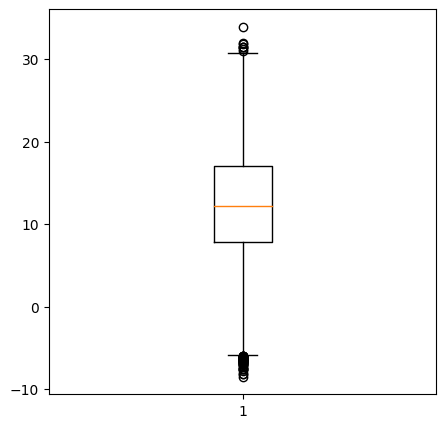

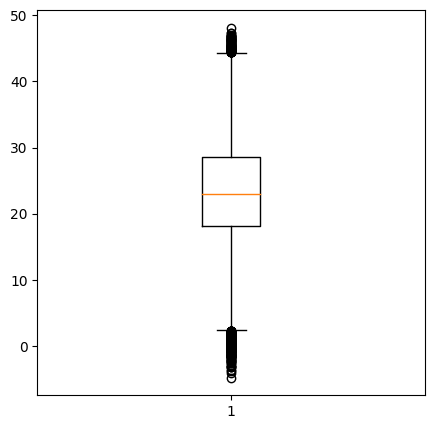

In [124]:
plt.figure(figsize = (5,5))
plt.boxplot(df['MinTemp'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['MaxTemp'])
plt.show()

In [125]:
perce25 = df['MinTemp'].quantile(0.25)
perce75 = df['MinTemp'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['MinTemp']<ub]
df = df.loc[df['MinTemp']>lb]

In [126]:
perce25 = df['MaxTemp'].quantile(0.25)
perce75 = df['MaxTemp'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['MaxTemp']<ub]
df = df.loc[df['MaxTemp']>lb]

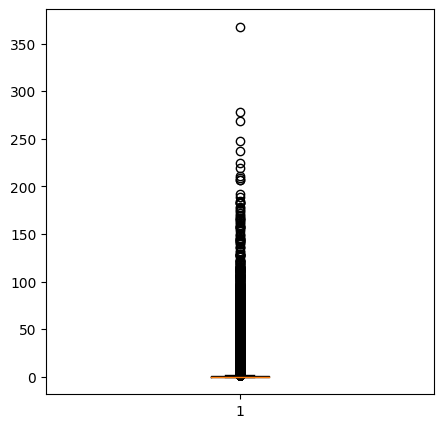

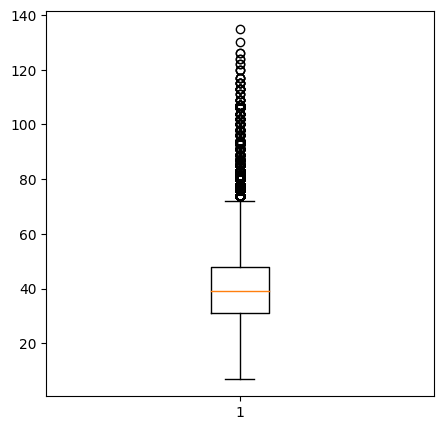

In [127]:
plt.figure(figsize = (5,5))
plt.boxplot(df['Rainfall'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['WindGustSpeed'])
plt.show()

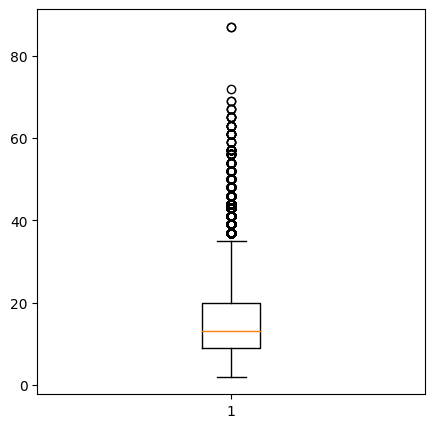

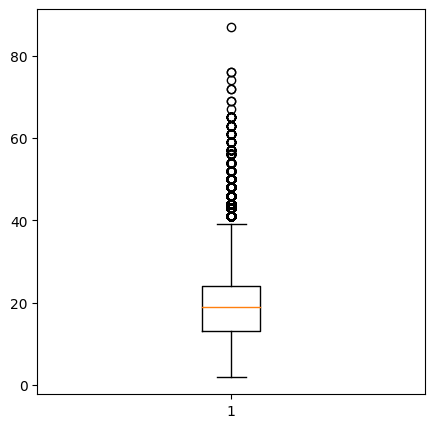

In [128]:
plt.figure(figsize = (5,5))
plt.boxplot(df['WindSpeed9am'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['WindSpeed3pm'])
plt.show()

In [129]:
perce25 = df['WindSpeed9am'].quantile(0.25)
perce75 = df['WindSpeed9am'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['WindSpeed9am']<ub]
df = df.loc[df['WindSpeed9am']>lb]

In [130]:
perce25 = df['WindSpeed3pm'].quantile(0.25)
perce75 = df['WindSpeed3pm'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['WindSpeed3pm']<ub]
df = df.loc[df['WindSpeed3pm']>lb]

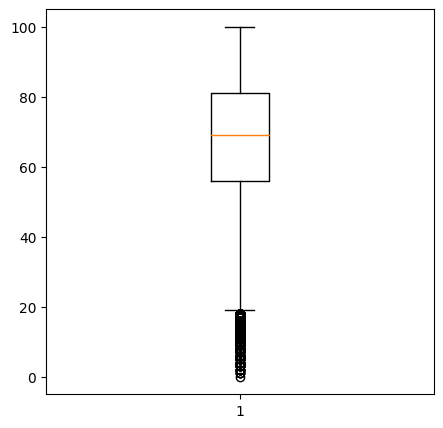

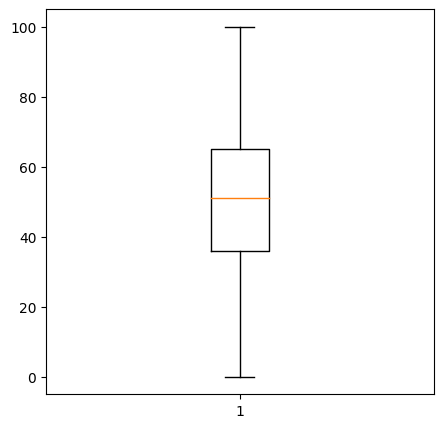

In [131]:
plt.figure(figsize = (5,5))
plt.boxplot(df['Humidity9am'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['Humidity3pm'])
plt.show()

In [132]:
perce25 = df['Humidity9am'].quantile(0.25)
perce75 = df['Humidity9am'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Humidity9am']<ub]
df = df.loc[df['Humidity9am']>lb]

In [133]:
perce25 = df['Humidity3pm'].quantile(0.25)
perce75 = df['Humidity3pm'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Humidity3pm']<ub]
df = df.loc[df['Humidity3pm']>lb]

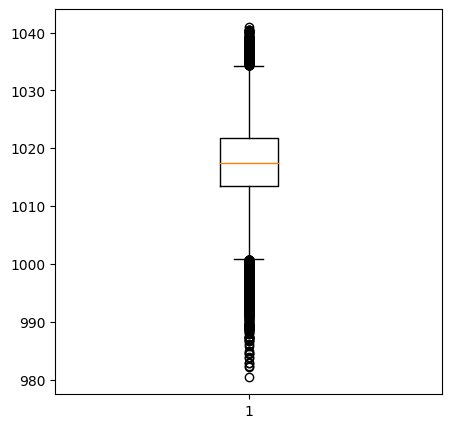

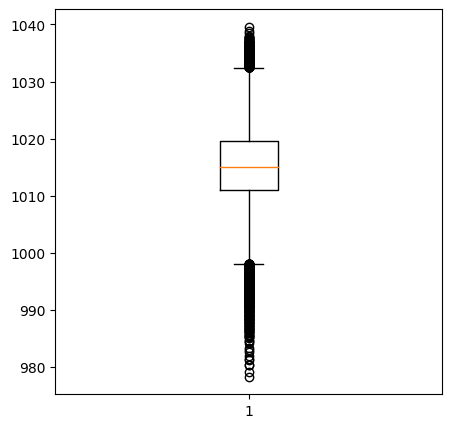

In [134]:
plt.figure(figsize = (5,5))
plt.boxplot(df['Pressure9am'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['Pressure3pm'])
plt.show()

In [135]:
perce25 = df['Pressure9am'].quantile(0.25)
perce75 = df['Pressure9am'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Pressure9am']<ub]
df = df.loc[df['Pressure9am']>lb]

In [136]:
perce25 = df['Pressure3pm'].quantile(0.25)
perce75 = df['Pressure3pm'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Pressure3pm']<ub]
df = df.loc[df['Pressure3pm']>lb]

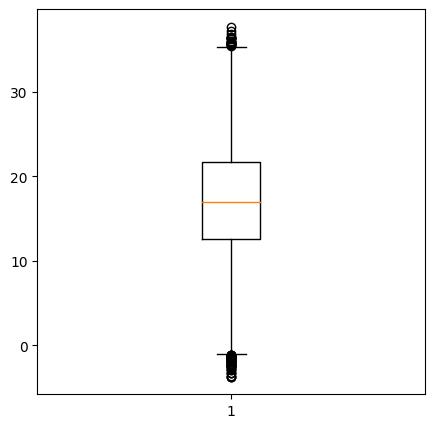

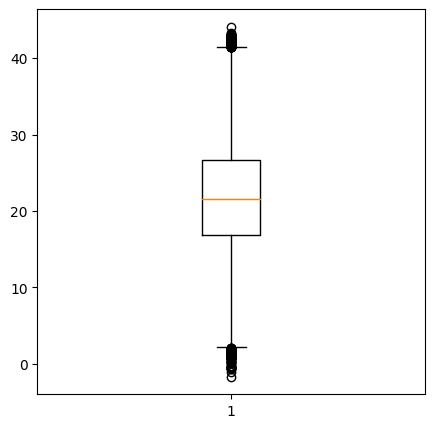

In [137]:
plt.figure(figsize = (5,5))
plt.boxplot(df['Temp9am'])
plt.show()

plt.figure(figsize = (5,5))
plt.boxplot(df['Temp3pm'])
plt.show()

In [138]:
perce25 = df['Temp9am'].quantile(0.25)
perce75 = df['Temp9am'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Temp9am']<ub]
df = df.loc[df['Temp9am']>lb]

In [139]:
perce25 = df['Temp3pm'].quantile(0.25)
perce75 = df['Temp3pm'].quantile(0.75)

IQR = perce75 - perce25

lb = perce25 - IQR*1.5
ub = perce75 + IQR*1.5

df = df.loc[df['Temp3pm']<ub]
df = df.loc[df['Temp3pm']>lb]

In [140]:
df.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object
WindSpeed9am,float64
WindSpeed3pm,float64


In [141]:
df.reset_index(inplace = True)

In [142]:
from sklearn.preprocessing import OneHotEncoder

In [143]:
encode = OneHotEncoder()

In [144]:
encoded_data = encode.fit_transform(df[['Location']])

In [145]:
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encode.get_feature_names_out(['Location']))

In [146]:
df_encoded.reset_index(inplace = True)

In [147]:
df_concat = pd.concat([df, df_encoded], axis = 1)

In [148]:
df_concat.shape

(115547, 68)

In [149]:
df_concat.drop('Location', axis = 1, inplace = True)

In [150]:
df_concat.head(5)

,index,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
df_concat['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'SE', 'NW', 'E', 'SSW', 'ESE'], dtype=object)

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
encoder = LabelEncoder()

In [154]:
df_concat['RainToday_encoded'] = encoder.fit_transform(df_concat['RainToday'])
df_concat['RainTomorrow_encoded'] = encoder.fit_transform(df_concat['RainTomorrow'])
df_concat['WindGustDir'] = encoder.fit_transform(df_concat['WindGustDir'])
df_concat['WindDir9am'] = encoder.fit_transform(df_concat['WindDir9am'])
df_concat['WindDir3pm'] = encoder.fit_transform(df_concat['WindDir3pm'])

In [155]:
df_concat.drop(['RainToday', 'RainTomorrow'], axis = 1, inplace = True)

In [156]:
df_concat.drop(['WindGustDir', 'WindDir9am','WindDir3pm'], axis = 1, inplace = True)

In [157]:
df_concat.drop('index', axis = 1, inplace = True)

In [201]:
features_to_include = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday_encoded',
    'RainTomorrow_encoded'
]

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df_concat.drop('RainTomorrow_encoded', axis = 1) , df_concat['RainTomorrow_encoded'] , train_size=0.7, random_state = 30)

In [160]:
df_concat.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Location_Adelaide',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Nhil',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Loc

In [203]:
features_to_include = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday_encoded',
    'RainTomorrow_encoded']

In [204]:
corr_df = df_concat[features_to_include]

In [205]:
correlation_matrix = corr_df.corr()

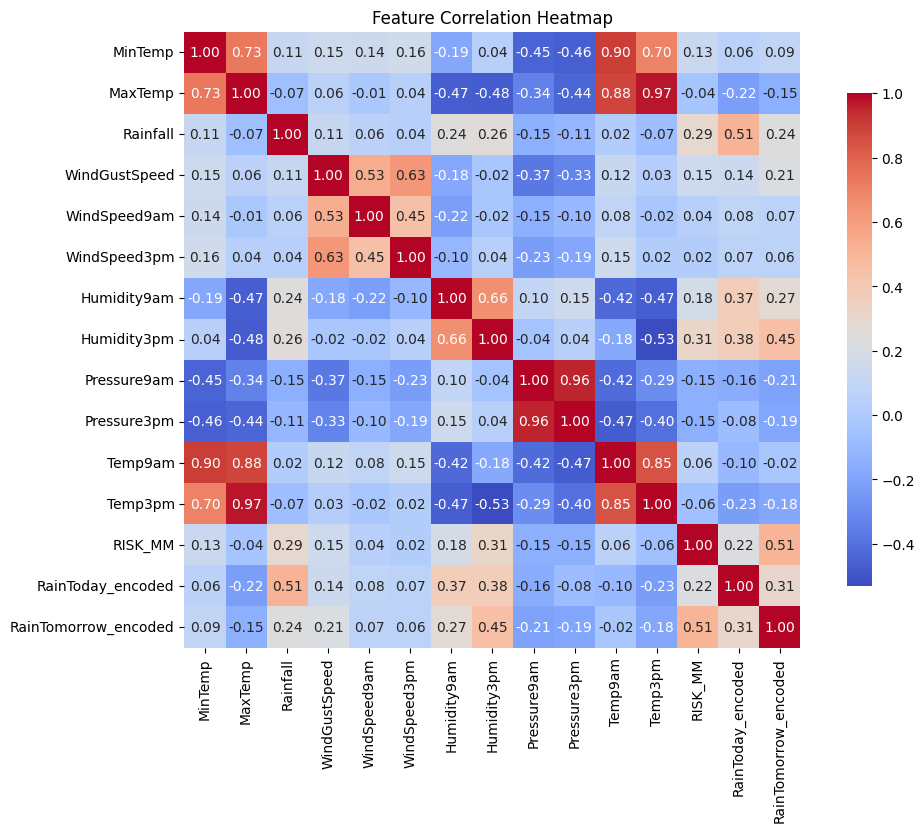

In [207]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.show()

In [161]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 30)

In [162]:
lr_model = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
Y_pred = lr_model.predict(X_test)

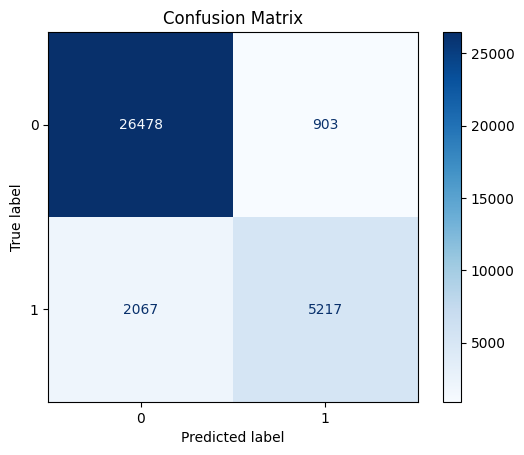

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [165]:
from sklearn.metrics import classification_report

In [166]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27381
           1       0.85      0.72      0.78      7284

    accuracy                           0.91     34665
   macro avg       0.89      0.84      0.86     34665
weighted avg       0.91      0.91      0.91     34665



In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA()

In [169]:
df_concat.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Location_Adelaide',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Nhil',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Loc

In [170]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Location_Adelaide',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Nhil',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Location_Sale', 'Location_SalmonGums', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong',
       'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Witchcliffe',
       'Location_Wollongong', 'Location_Woomera', 'RainToday_encoded',
       'RainTomorrow_encoded']

In [171]:
x = df_concat.loc[:,features].values

In [172]:
y = df_concat.loc[:,['RainTomorrow_encoded']].values

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
sc = StandardScaler()
scaled_data = sc.fit(x)
scaled_data = sc.transform(x)

In [175]:
pca.fit(scaled_data)

PCA()

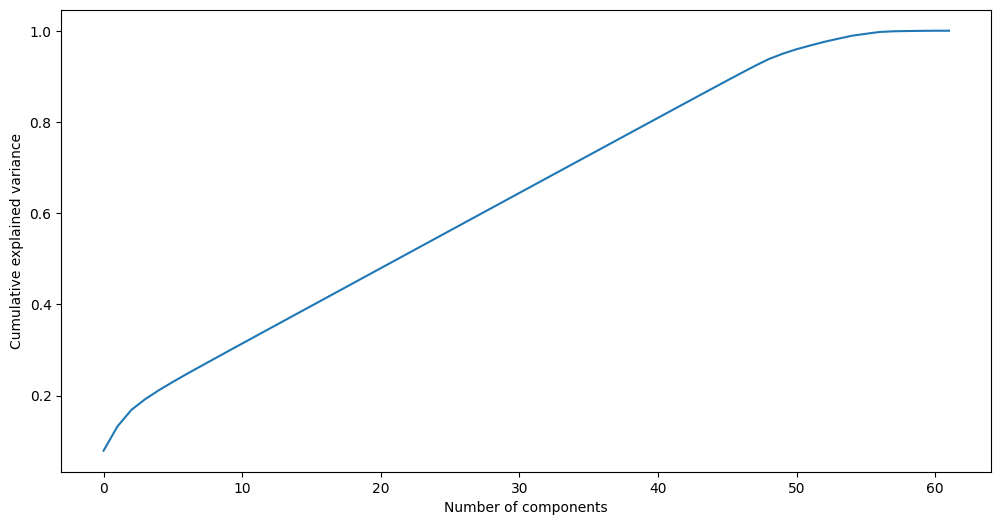

In [176]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [177]:
pca = PCA(n_components = 40)

In [178]:
pca.fit(scaled_data)

PCA(n_components=40)

In [179]:
x_pca = pca.transform(scaled_data)

In [180]:
x_pca = pd.DataFrame(x_pca)

In [181]:
x_pca

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.144163,0.005014,0.753625,-2.128223,-0.580094,-0.737740,0.020462,0.207440,1.059334,0.206679,...,-0.437254,-1.444831,-1.364221,-4.039334,-2.638257,-2.400731,0.159423,-1.222917,-2.352516,0.312296
1,1.104764,-1.119297,0.069348,-2.502262,-0.354572,-0.553793,-0.577497,0.274175,0.997229,0.148551,...,-0.451509,-1.439934,-1.372444,-4.039239,-2.639498,-2.402243,0.161625,-1.232815,-2.344985,0.311482
2,1.995241,-0.347821,1.131360,-1.895676,-0.328689,-0.343911,-0.244770,0.295611,1.053313,0.154570,...,-0.446078,-1.440413,-1.370341,-4.039064,-2.640897,-2.399422,0.157986,-1.232445,-2.350061,0.309828
3,0.850266,-2.412335,-1.031813,-1.576873,0.419623,-0.552582,-0.038243,0.331484,0.984654,0.172890,...,-0.443809,-1.442181,-1.368109,-4.037577,-2.643790,-2.406645,0.159209,-1.231083,-2.351614,0.311659
4,1.936197,-0.379636,-1.062585,-1.927463,-0.816560,-1.031223,-0.162778,0.139670,0.940280,0.177103,...,-0.443076,-1.443253,-1.365042,-4.043120,-2.636227,-2.404850,0.165427,-1.226422,-2.351031,0.312764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115542,-1.063666,-2.673758,0.834302,-0.282262,2.121280,0.350468,0.509046,0.113254,-0.391227,-0.262744,...,-0.292485,0.027422,-0.336593,-0.035906,0.042553,-0.196905,0.001624,-0.445910,0.210563,0.219406
115543,-0.732995,-2.961382,0.690612,-0.476258,2.258478,0.412393,0.450175,0.125622,-0.404471,-0.275987,...,-0.295274,0.027839,-0.339174,-0.035625,0.042610,-0.198291,0.002047,-0.447891,0.211887,0.219127
115544,-0.445977,-3.147696,0.109292,-0.552217,2.209383,0.325491,0.593927,0.166723,-0.363358,-0.270913,...,-0.293642,0.026425,-0.338848,-0.037305,0.040371,-0.196009,0.000757,-0.448656,0.211320,0.217785
115545,0.278509,-2.698398,0.289915,-0.940035,2.068253,0.401902,0.392488,0.064743,-0.456896,-0.303978,...,-0.297910,0.028784,-0.339377,-0.035237,0.047964,-0.200116,0.005377,-0.450917,0.211754,0.219830


Text(0, 0.5, 'Principal Component 2')

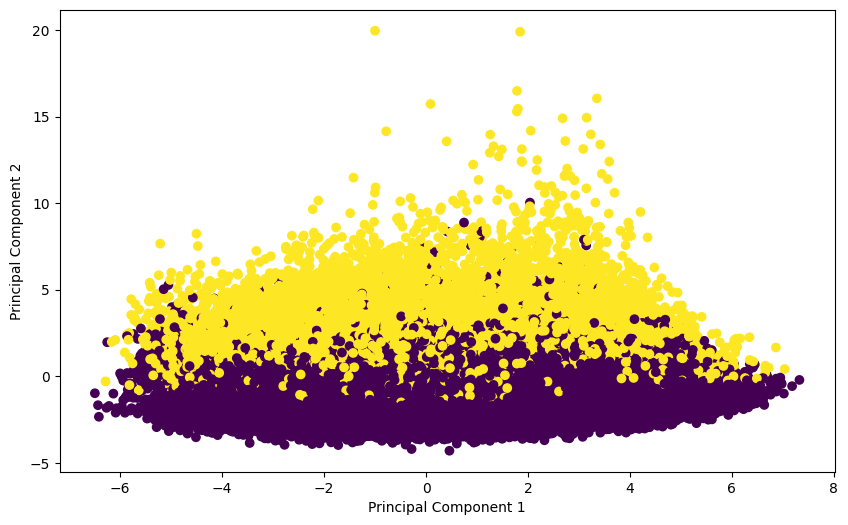

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[0], x_pca[1],c = df_concat['RainTomorrow_encoded'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [183]:
finalDF  = pd.concat([x_pca, df_concat[['RainTomorrow_encoded']]], axis = 1)

In [184]:
pca.explained_variance_ratio_

array([0.07916654, 0.05312736, 0.03615307, 0.02372921, 0.01981303,
       0.01806403, 0.01733411, 0.01678509, 0.01671315, 0.01667685,
       0.01656786, 0.01655091, 0.01653637, 0.01653006, 0.01652422,
       0.01652104, 0.01651698, 0.0165148 , 0.01651075, 0.01650788,
       0.0165063 , 0.01650479, 0.01650409, 0.0165029 , 0.01649952,
       0.01649783, 0.01649632, 0.0164919 , 0.01648945, 0.01648572,
       0.01648482, 0.01648314, 0.0164827 , 0.01647303, 0.01646899,
       0.01646513, 0.01646443, 0.01646089, 0.01645742, 0.0164529 ])

In [185]:
0.07916654 + 0.05312736 + 0.03615307 + 0.02372921 + 0.01981303 + 0.01806403 + 0.01733411 + 0.01678509 + 0.01671315 + 0.01667685 +0.01656786 + 0.01655091 + 0.01653637 + 0.01653006 + 0.01652422 +0.01652104 + 0.01651698 + 0.0165148 + 0.01651075 + 0.01650788 +0.0165063  + 0.01650479 + 0.01650409 + 0.0165029  + 0.01649952 +0.01649783 + 0.01649632 + 0.0164919  + 0.01648945 + 0.01648572 +0.01648482 + 0.01648314 + 0.0164827  + 0.01647303 + 0.01646899 +0.01646513 + 0.01646443 + 0.01646089 + 0.01645742 + 0.0164529


0.7925155799999999

In [186]:
X_train, X_test, y_train, y_test = train_test_split(finalDF.drop('RainTomorrow_encoded', axis = 1) , finalDF['RainTomorrow_encoded'] , train_size=0.7, random_state = 30)

In [187]:
model_1 = lr_model.fit(X_train, y_train)

In [188]:
y_pred = model_1.predict(X_test)

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27381
           1       0.88      0.81      0.84      7284

    accuracy                           0.94     34665
   macro avg       0.91      0.89      0.90     34665
weighted avg       0.94      0.94      0.94     34665



In [190]:
import joblib

In [191]:
joblib.dump(model, 'logistic_rain.pkl')

['logistic_rain.pkl']

In [192]:
df_concat.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,RainToday_encoded,RainTomorrow_encoded
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [193]:
df.columns

Index(['index', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

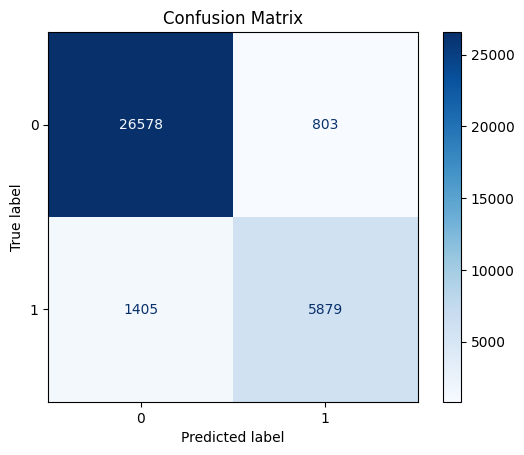

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [195]:
df_concat.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Location_Adelaide',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Nhil',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Loc

In [196]:
df.head(2)

,index,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No


In [197]:
df_concat.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,RainToday_encoded,RainTomorrow_encoded
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [198]:
df.iloc[89]

,89
index,106
Location,Albury
MinTemp,9.3
MaxTemp,28.0
Rainfall,0.0
WindGustDir,NW
WindGustSpeed,52.0
WindDir9am,SSE
WindDir3pm,NW
WindSpeed9am,6.0


In [208]:
model

LogisticRegression(max_iter=30)